# ডেটা স্কেলিং টেকনিক

## ডেটা স্কেলিং কী?
ডেটা স্কেলিং (normalization/standardization) হলো একটি প্রিপ্রসেসিং পদ্ধতি যা বিভিন্ন ফিচারকে একই স্কেলে রূপান্তর করে। এটি অত্যন্ত গুরুত্বপূর্ণ কারণ:
- **মেশিন লার্নিং অ্যালগরিদম** (বিশেষত distance-based যেমন KNN, SVM) ভালো কাজ করে যখন সব ফিচার একই স্কেলে থাকে
- **Gradient descent** দ্রুত converge করে যখন ফিচার normalize করা থাকে
- **বড় রেঞ্জের ফিচার** মডেলকে dominate করা থেকে বিরত রাখে

## এই নোটবুকে আমরা শিখব:
1. **Z-Score Normalization (স্ট্যান্ডার্ডাইজেশন)** - ডেটাকে গড়ের চারপাশে কেন্দ্রীভূত করে, variance = 1
2. **Min-Max Normalization** - ডেটাকে একটি নির্দিষ্ট রেঞ্জে [0, 1] স্কেল করে
3. **Robust Scaling** - median এবং IQR ব্যবহার করে, outlier প্রতিরোধী

In [535]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for better-looking plots
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

## ১. Z-Score Normalization (স্ট্যান্ডার্ডাইজেশন)

**সূত্র:** `z = (x - μ) / σ`

যেখানে:
- `μ` = ফিচারের গড় (mean)
- `σ` = স্ট্যান্ডার্ড ডেভিয়েশন (standard deviation)

### **কীভাবে কাজ করে - ধাপে ধাপে:**

#### **ধাপ ১: গড় বিয়োগ করা (Centering)**
প্রতিটি ভ্যালু থেকে গড় বিয়োগ করুন। এতে ডেটা শূন্যের চারপাশে কেন্দ্রীভূত হয়।

**উদাহরণ:**
```
মূল ডেটা: 150, 160, 170, 180, 190
গড় (μ) = (150+160+170+180+190)/5 = 170

গড় বিয়োগের পর:
150 - 170 = -20
160 - 170 = -10
170 - 170 =   0
180 - 170 = +10
190 - 170 = +20
```
লক্ষ্য করুন: মাঝের ভ্যালু (170) এখন 0 হয়ে গেছে!

#### **ধাপ ২: স্ট্যান্ডার্ড ডেভিয়েশন দিয়ে ভাগ (Scaling)**
তারপর স্ট্যান্ডার্ড ডেভিয়েশন (σ = 15.81) দিয়ে ভাগ করুন।

**উদাহরণ:**
```
-20 / 15.81 = -1.26
-10 / 15.81 = -0.63
  0 / 15.81 =  0.00
+10 / 15.81 = +0.63
+20 / 15.81 = +1.26
```

### **কখন ব্যবহার করবেন:**
✅ যখন ডেটা **নরমাল ডিস্ট্রিবিউশন** (Gaussian/bell curve) অনুসরণ করে
✅ **Linear Regression, Logistic Regression** এর মতো অ্যালগরিদমে
✅ যখন ডেটাকে শূন্যের কাছাকাছি কেন্দ্রীভূত করতে হয়
✅ **Neural Networks** এর hidden layers-এ

### **সুবিধা:**
- রূপান্তরণের পর ডেটার **গড় = 0** এবং **স্ট্যান্ডার্ড ডেভিয়েশন = 1** হবে
- অধিকাংশ মান **-3 থেকে +3** এর মধ্যে থাকবে
- Gradient descent দ্রুত converge করে

### **অসুবিধা:**
❌ **Outlier থাকলে সমস্যা হয়** কারণ গড় ও স্ট্যান্ডার্ড ডেভিয়েশন outlier দ্বারা প্রভাবিত হয়

---

### **নিচের উদাহরণে:**
- উচ্চতা (h): 150, 160, 170, 180, 190 সেমি
- ওজন (w): 50, 60, 70, 80, 90 কেজি
- উভয়ের গড় = 170 এবং 70
- রূপান্তরণের পর সব ভ্যালু **-1.26 থেকে +1.26** এর মধ্যে থাকবে

### **বাস্তব জীবনের উদাহরণ:**
ধরুন একটি ক্লাসে পরীক্ষার নম্বর: 60, 70, 80, 90, 100
- গড় = 80
- যে স্টুডেন্ট 80 পেয়েছে তার z-score = 0 (গড়ের সমান)
- যে 100 পেয়েছে তার z-score = ধনাত্মক (গড়ের উপরে)
- যে 60 পেয়েছে তার z-score = ঋণাত্মক (গড়ের নিচে)

In [536]:
df = pd.DataFrame({
    'h': [150, 160, 170, 180, 190],
    'w': [50, 60, 70, 80, 90]
})

df

,h,w
0,150,50
1,160,60
2,170,70
3,180,80
4,190,90


In [537]:
mean = df.mean()
print("Mean:\n", mean)

std = df.std()
print("Standard Deviation:\n", std)

Mean:
 h    170.0
w     70.0
dtype: float64
Standard Deviation:
 h    15.811388
w    15.811388
dtype: float64


In [538]:
z = (df - mean) / std
z.round(2)

,h,w
0,-1.26,-1.26
1,-0.63,-0.63
2,0.00,0.00
3,0.63,0.63
4,1.26,1.26


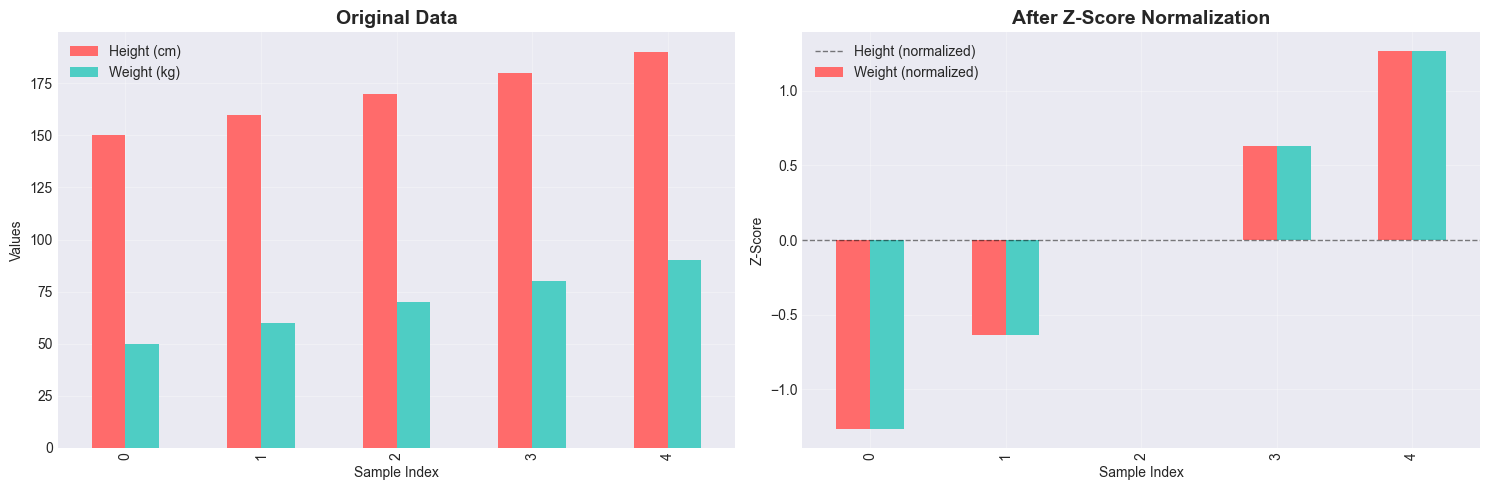

✓ Original mean: Height=170.00, Weight=70.00
✓ Normalized mean: Height=4.44e-17, Weight=4.44e-17
✓ Normalized std: Height=1.00, Weight=1.00


In [539]:
# Visualize the Z-score normalization
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot 1: Original data
df.plot(kind='bar', ax=axes[0], color=['#FF6B6B', '#4ECDC4'])
axes[0].set_title('Original Data', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sample Index')
axes[0].set_ylabel('Values')
axes[0].legend(['Height (cm)', 'Weight (kg)'])
axes[0].grid(True, alpha=0.3)

# Plot 2: Z-scores
z.plot(kind='bar', ax=axes[1], color=['#FF6B6B', '#4ECDC4'])
axes[1].set_title('After Z-Score Normalization', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sample Index')
axes[1].set_ylabel('Z-Score')
axes[1].axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
axes[1].legend(['Height (normalized)', 'Weight (normalized)'])
axes[1].grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

print(f"✓ Original mean: Height={df['h'].mean():.2f}, Weight={df['w'].mean():.2f}")
print(f"✓ Normalized mean: Height={z['h'].mean():.2e}, Weight={z['w'].mean():.2e}")
print(f"✓ Normalized std: Height={z['h'].std():.2f}, Weight={z['w'].std():.2f}")

In [540]:
df = pd.DataFrame({
    'h': [150, 175, 170, 180, 190],
    'w': [50, 60, 70, 80, 90]
})

df

,h,w
0,150,50
1,175,60
2,170,70
3,180,80
4,190,90


## ২. Min-Max Normalization (মিন-ম্যাক্স নর্মালাইজেশন)

**সূত্র:** `x_scaled = (x - x_min) / (x_max - x_min)`

যেখানে:
- `x_min` = ফিচারের সর্বনিম্ন ভ্যালু
- `x_max` = ফিচারের সর্বোচ্চ ভ্যালু

### **কীভাবে কাজ করে - দুই ধাপে বিস্তারিত:**

#### **ধাপ ১: Shift to Zero (শূন্যে নিয়ে আসা)**
সব ডেটা থেকে minimum বিয়োগ করুন। এতে সবচেয়ে ছোট ভ্যালু 0 হয়ে যায়।

**উদাহরণ:**
```
মূল ডেটা (উচ্চতা): 150, 175, 170, 180, 190 সেমি
Minimum = 150
Maximum = 190
Range = 190 - 150 = 40

ধাপ ১ এর পর (x - min):
150 - 150 = 0   ← সবচেয়ে ছোট ভ্যালু এখন 0
175 - 150 = 25
170 - 150 = 20
180 - 150 = 30
190 - 150 = 40
```

#### **ধাপ ২: Scale to [0,1] (০-১ রেঞ্জে স্কেল করা)**
রেঞ্জ (max - min) দিয়ে ভাগ করুন। এতে সবচেয়ে বড় ভ্যালু 1 হয়ে যায়।

**উদাহরণ:**
```
ধাপ ২: Range দিয়ে ভাগ (÷ 40):
0 ÷ 40 = 0.00   ← সবচেয়ে ছোট মান
25 ÷ 40 = 0.62
20 ÷ 40 = 0.50
30 ÷ 40 = 0.75
40 ÷ 40 = 1.00  ← সবচেয়ে বড় মান
```

### **কখন ব্যবহার করবেন:**
✅ যখন ডেটা একটি নির্দিষ্ট রেঞ্জে **[0, 1]** রাখতে হয়
✅ **Neural Networks** এর input layer-এ (activation functions-এর জন্য)
✅ **KNN (K-Nearest Neighbors)** এর মতো distance-based অ্যালগরিদমে
✅ যখন ডেটার কোনো **distribution assume** করতে চান না
✅ **Image processing** এ (pixel values 0-255 থেকে 0-1 এ রূপান্তর)

### **সুবিধা:**
- সব ডেটা **[0, 1]** রেঞ্জে থাকে (খুবই সহজবোধ্য)
- কোনো **distribution assumption** দরকার নেই
- **সহজে বুঝা যায়**: 0 = minimum, 1 = maximum, 0.5 = মাঝামাঝি

### **অসুবিধা - খুবই গুরুত্বপূর্ণ!**
❌ **Outlier-এর জন্য খুবই সমস্যা!** কারণ outlier সাধারণ ভ্যালুগুলো compress করে দেয়

**Outlier-এর সমস্যা বোঝার উদাহরণ:**
```
ভালো ডেটা (outlier নেই):
মূল: 150, 160, 170, 180, 190
Scaled: 0.00, 0.25, 0.50, 0.75, 1.00  ← সবকিছু সুন্দরভাবে ছড়ানো

খারাপ ডেটা (outlier আছে):
মূল: 150, 160, 170, 180, 5000  ← 5000 হলো outlier!
Scaled: 0.00, 0.002, 0.004, 0.006, 1.00  ← প্রথম চারটি প্রায় 0!
```
দেখুন কীভাবে outlier সাধারণ মানগুলো নষ্ট করে দিয়েছে!

### **বাস্তব জীবনের উদাহরণ:**
**পরীক্ষার নম্বর normalize করা:**
```
ক্লাসে পরীক্ষার নম্বর: 60, 70, 80, 90, 100
Min = 60, Max = 100, Range = 40

Scaled values:
60 → (60-60)/40 = 0.00  (সবচেয়ে কম নম্বর)
70 → (70-60)/40 = 0.25
80 → (80-60)/40 = 0.50  (মাঝামাঝি)
90 → (90-60)/40 = 0.75
100 → (100-60)/40 = 1.00 (সবচেয়ে বেশি নম্বর)
```

---

### **নিচের উদাহরণে লক্ষ্য করুন:**
- উচ্চতা: 150, 175, 170, 180, 190
- ওজন: 50, 60, 70, 80, 90
- উভয়ই **[0.00, 1.00]** রেঞ্জে রূপান্তরিত হবে
- সবচেয়ে ছোট মান = 0.00, সবচেয়ে বড় মান = 1.00

### **মনে রাখবেন:**
- ✅ Outlier নেই → Min-Max ব্যবহার করুন
- ❌ Outlier আছে → Robust Scaling ব্যবহার করুন!

In [541]:
mini = df.min()
maxi = df.max()

data_range = maxi - mini

mini, maxi, data_range

(h    150
 w     50
 dtype: int64,
 h    190
 w     90
 dtype: int64,
 h    40
 w    40
 dtype: int64)

In [542]:
shift_zero = df - mini
shift_zero

,h,w
0,0,0
1,25,10
2,20,20
3,30,30
4,40,40


In [543]:
scaled = shift_zero / data_range
scaled.round(2)

,h,w
0,0.00,0.00
1,0.62,0.25
2,0.50,0.50
3,0.75,0.75
4,1.00,1.00


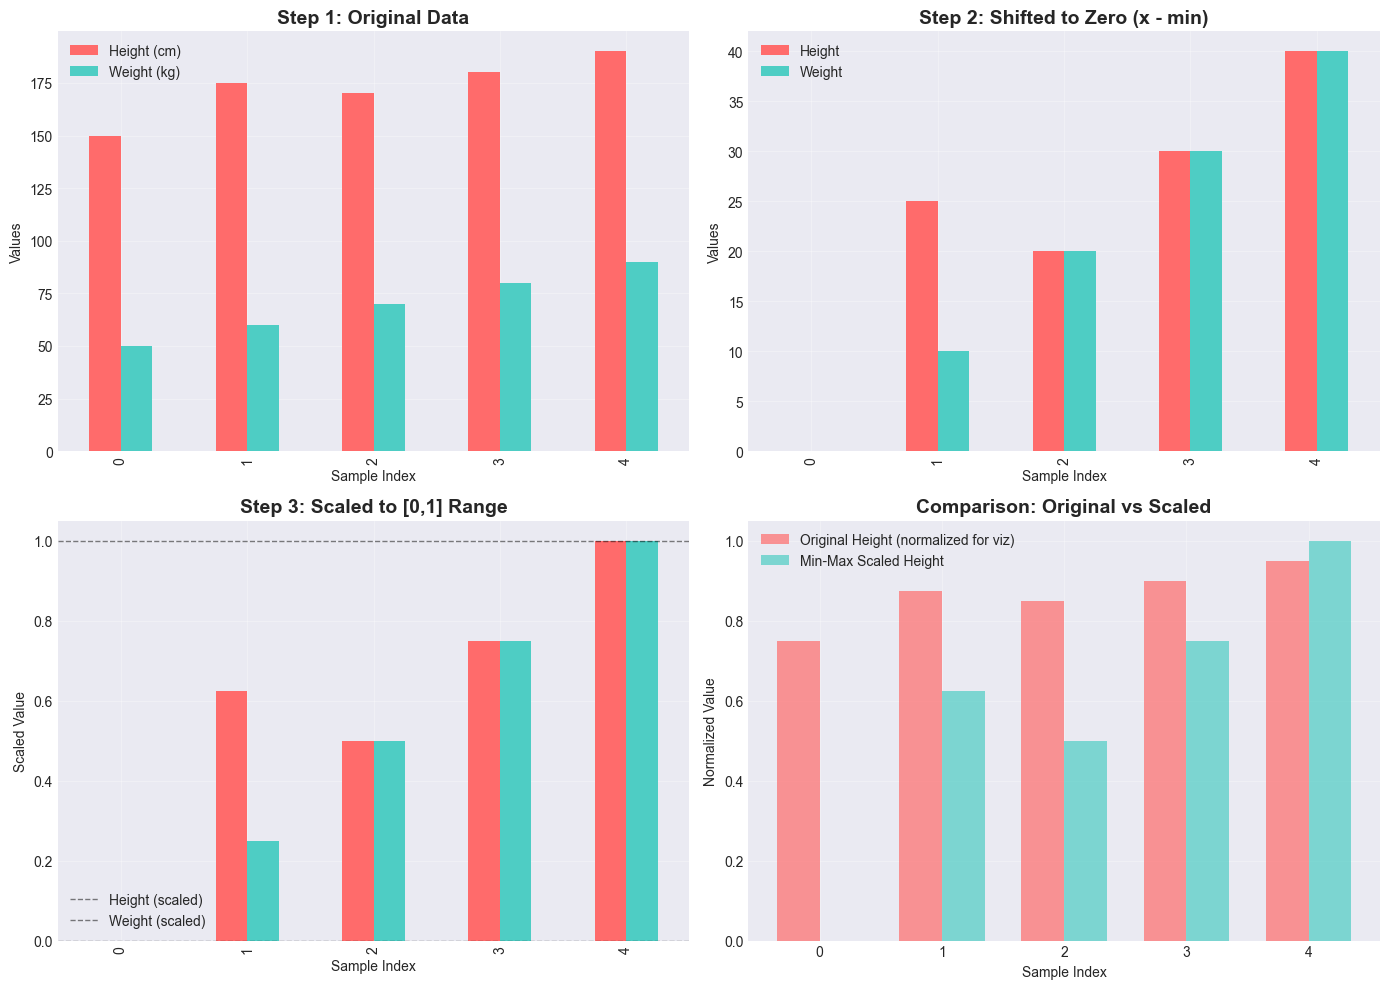

✓ Original range: Height=[150, 190], Weight=[50, 90]
✓ Scaled range: Height=[0.00, 1.00], Weight=[0.00, 1.00]


In [544]:
# Visualize Min-Max normalization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Original data
df.plot(kind='bar', ax=axes[0, 0], color=['#FF6B6B', '#4ECDC4'])
axes[0, 0].set_title('Step 1: Original Data', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Sample Index')
axes[0, 0].set_ylabel('Values')
axes[0, 0].legend(['Height (cm)', 'Weight (kg)'])
axes[0, 0].grid(True, alpha=0.3)

# Plot 2: After shifting to zero
shift_zero.plot(kind='bar', ax=axes[0, 1], color=['#FF6B6B', '#4ECDC4'])
axes[0, 1].set_title('Step 2: Shifted to Zero (x - min)', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Sample Index')
axes[0, 1].set_ylabel('Values')
axes[0, 1].legend(['Height', 'Weight'])
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Final scaled data
scaled.plot(kind='bar', ax=axes[1, 0], color=['#FF6B6B', '#4ECDC4'])
axes[1, 0].set_title('Step 3: Scaled to [0,1] Range', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Sample Index')
axes[1, 0].set_ylabel('Scaled Value')
axes[1, 0].axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
axes[1, 0].axhline(y=1, color='black', linestyle='--', linewidth=1, alpha=0.5)
axes[1, 0].legend(['Height (scaled)', 'Weight (scaled)'])
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Side-by-side comparison
x = np.arange(len(df))
width = 0.35
axes[1, 1].bar(x - width/2, df['h']/200, width, label='Original Height (normalized for viz)', alpha=0.7, color='#FF6B6B')
axes[1, 1].bar(x + width/2, scaled['h'], width, label='Min-Max Scaled Height', alpha=0.7, color='#4ECDC4')
axes[1, 1].set_title('Comparison: Original vs Scaled', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Sample Index')
axes[1, 1].set_ylabel('Normalized Value')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"✓ Original range: Height=[{df['h'].min()}, {df['h'].max()}], Weight=[{df['w'].min()}, {df['w'].max()}]")
print(f"✓ Scaled range: Height=[{scaled['h'].min():.2f}, {scaled['h'].max():.2f}], Weight=[{scaled['w'].min():.2f}, {scaled['w'].max():.2f}]")

In [545]:
df = pd.DataFrame({
    'h': [150, 160, 170, 180, 300],
    'w': [50, 60, 70, 80, 200]
})

df

,h,w
0,150,50
1,160,60
2,170,70
3,180,80
4,300,200


## ৩. Robust Scaling (রোবাস্ট স্কেলিং) - Outlier-এর জন্য সেরা!

**সূত্র:** `x_robust = (x - median) / IQR`

যেখানে:
- `median` = মধ্যমা (মাঝের ভ্যালু)
- `IQR` = Interquartile Range (Q3 - Q1)
  - **Q1** = 25th percentile (নিচের 25% ডেটার শেষ মান)
  - **Q3** = 75th percentile (নিচের 75% ডেটার শেষ মান)

### **কীভাবে কাজ করে - ধাপে ধাপে:**

#### **মূল ধারণা:**
Z-Score এবং Min-Max-এর সমস্যা হলো তারা **গড় (mean)** এবং **minimum/maximum** ব্যবহার করে। Outlier থাকলে এগুলো প্রভাবিত হয়। 

Robust Scaling এই সমস্যা সমাধান করে **median** এবং **IQR** ব্যবহার করে, যা outlier দ্বারা প্রভাবিত হয় না!

#### **ধাপ ১: Median বের করা**
**Median কী?** ডেটাকে সাজালে মাঝখানের মান।

**উদাহরণ:**
```
মূল ডেটা: 150, 160, 170, 180, 300  ← 300 হলো outlier!
সাজানো: 150, 160, 170, 180, 300
Median = 170 (মাঝের মান)

গড় হলে: (150+160+170+180+300)/5 = 192  ← outlier দ্বারা প্রভাবিত!
Median = 170  ← outlier দ্বারা প্রভাবিত নয়!
```

#### **ধাপ ২: IQR (Interquartile Range) বের করা**
**IQR কী?** মাঝের 50% ডেটার বিস্তার।

**উদাহরণ:**
```
ডেটা: 150, 160, 170, 180, 300

Q1 (25th percentile) = 160  ← নিচের 25% এর শেষ
Q3 (75th percentile) = 180  ← নিচের 75% এর শেষ
IQR = Q3 - Q1 = 180 - 160 = 20

Standard Deviation হলে = 58.3  ← outlier দ্বারা প্রভাবিত!
IQR = 20  ← outlier দ্বারা প্রভাবিত নয়!
```

#### **ধাপ ৩: Robust Scaling প্রয়োগ**
**সূত্র:** (x - median) / IQR

**উদাহরণ:**
```
ডেটা: 150, 160, 170, 180, 300
Median = 170, IQR = 20

Scaling:
150 → (150-170)/20 = -20/20 = -1.0  ← সাধারণ মান
160 → (160-170)/20 = -10/20 = -0.5  ← সাধারণ মান
170 → (170-170)/20 =   0/20 =  0.0  ← সাধারণ মান
180 → (180-170)/20 = +10/20 = +0.5  ← সাধারণ মান
300 → (300-170)/20 = 130/20 = +6.5  ← outlier আলাদা হয়ে গেছে!
```

দেখুন! সাধারণ মান **[-1, +1]** এর মধ্যে, কিন্তু outlier (+6.5) আলাদাভাবে চিহ্নিত!

### **কেন এটি Outlier-এর জন্য সেরা - তুলনা:**

| পদ্ধতি | ডেটা (outlier সহ) | Scaled ফলাফল | সমস্যা |
|--------|-------------------|--------------|---------|
| **Z-Score** | 150, 160, 170, 180, 300 | -0.72, -0.55, -0.38, -0.21, +1.86 | সব মান ছোট হয়ে গেছে! |
| **Min-Max** | 150, 160, 170, 180, 300 | 0.00, 0.07, 0.13, 0.20, 1.00 | সাধারণ মান compress! |
| **Robust** | 150, 160, 170, 180, 300 | -1.0, -0.5, 0.0, +0.5, +6.5 | সাধারণ মান ঠিক আছে! ✅ |

### **কখন ব্যবহার করবেন:**
✅ **যখন ডেটাতে outlier আছে** ← এটিই মূল সুবিধা!
✅ বাস্তব দুনিয়ার **noisy ডেটাসেট**-এর জন্য
✅ বেশিরভাগ practical machine learning প্রজেক্টে
✅ **Medical data**, sensor data, financial data ইত্যাদিতে
✅ যখন **নিশ্চিত নন** কোন পদ্ধতি ব্যবহার করবেন

### **সুবিধা:**
- **Outlier প্রতিরোধী** (outlier-resistant) - মূল শক্তি!
- সাধারণ ভ্যালু **[-2, 2]** রেঞ্জে থাকে
- Outlier আলাদাভাবে চিহ্নিত হয়
- বাস্তব ডেটার জন্য সবচেয়ে **নিরাপদ পছন্দ**

### **অসুবিধা:**
- রেঞ্জ কম **intuitive** (Z-Score বা Min-Max এর মতো fixed নয়)
- খুব ছোট ডেটাসেটে median/IQR সঠিকভাবে নাও হতে পারে

### **বাস্তব জীবনের উদাহরণ:**
**ক্লাসে পরীক্ষার নম্বর (একজন copy করেছে!):**
```
ছাত্রদের নম্বর: 60, 65, 70, 75, 80, 100  ← 100 অস্বাভাবিক!

Median = (70+75)/2 = 72.5
Q1 = 65, Q3 = 80
IQR = 80 - 65 = 15

Robust Scaled:
60 → (60-72.5)/15 = -0.83  ← স্বাভাবিক
65 → (65-72.5)/15 = -0.50  ← স্বাভাবিক
70 → (70-72.5)/15 = -0.17  ← স্বাভাবিক
75 → (75-72.5)/15 = +0.17  ← স্বাভাবিক
80 → (80-72.5)/15 = +0.50  ← স্বাভাবিক
100 → (100-72.5)/15 = +1.83 ← outlier চিহ্নিত!
```

---

### **নিচের উদাহরণে লক্ষ্য করুন:**
- উচ্চতা: 150, 160, 170, 180, **300** ← 300 হলো outlier!
- ওজন: 50, 60, 70, 80, **200** ← 200 হলো outlier!
- Median = 170 (উচ্চতা), 70 (ওজন)
- IQR = 20 (উচ্চতা), 20 (ওজন)
- রূপান্তরিত ভ্যালু: -1.0, -0.5, 0.0, 0.5, **6.5** ← outlier আলাদা!

### **মনে রাখার সহজ উপায়:**
- 💡 **Robust = শক্তিশালী** → Outlier-এর বিরুদ্ধে শক্তিশালী!
- 💡 **Median** → গড়ের চেয়ে নিরাপদ
- 💡 **IQR** → মাঝের 50% ডেটার বিস্তার
- 💡 **সবচেয়ে নিরাপদ পছন্দ** → Doubt থাকলে এটি ব্যবহার করুন!

In [546]:
median = df.median()

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)

iqr = q3 - q1

median, q1, q3, iqr

(h    170.0
 w     70.0
 dtype: float64,
 h    160.0
 w     60.0
 Name: 0.25, dtype: float64,
 h    180.0
 w     80.0
 Name: 0.75, dtype: float64,
 h    20.0
 w    20.0
 dtype: float64)

In [547]:
centered = df - median
centered

,h,w
0,-20.0,-20.0
1,-10.0,-10.0
2,0.0,0.0
3,10.0,10.0
4,130.0,130.0


In [548]:
robust_scaled = centered / iqr
robust_scaled.round(2)

,h,w
0,-1.0,-1.0
1,-0.5,-0.5
2,0.0,0.0
3,0.5,0.5
4,6.5,6.5


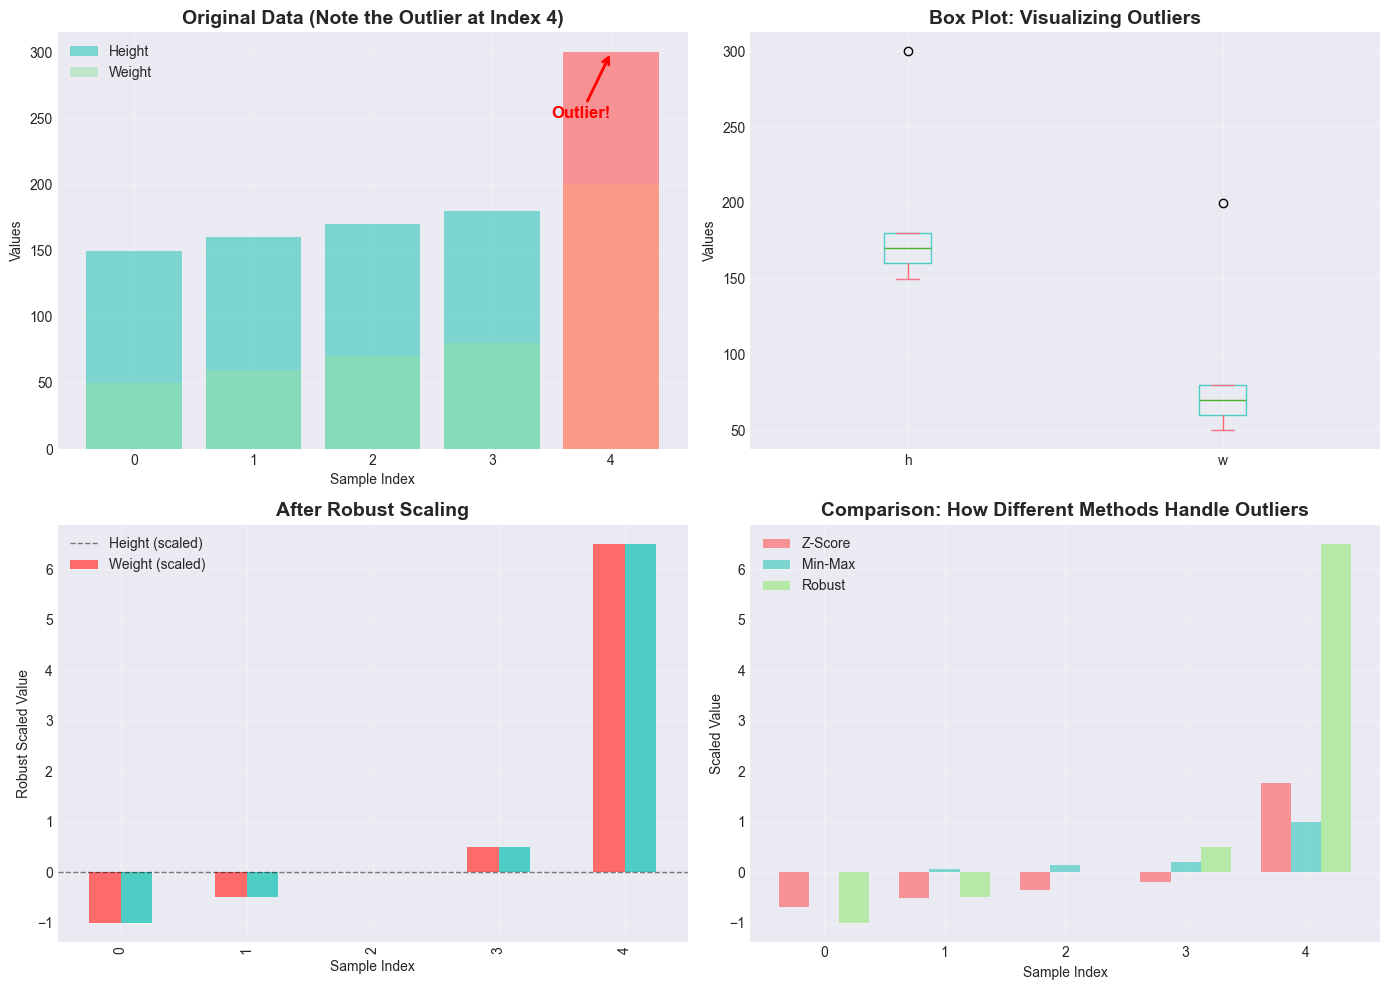

✓ Median: Height=170.00, Weight=70.00
✓ IQR: Height=20.00, Weight=20.00
✓ Notice: Normal values stay in range [-1, 1], outlier is at 6.50


In [549]:
# Visualize Robust Scaling and its advantage with outliers
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Original data with outlier highlighted
colors_h = ['#4ECDC4' if i < 4 else '#FF6B6B' for i in range(len(df))]
colors_w = ["#95E1A4" if i < 4 else '#FFA07A' for i in range(len(df))]
axes[0, 0].bar(range(len(df)), df['h'], color=colors_h, alpha=0.7, label='Height')
axes[0, 0].bar(range(len(df)), df['w'], color=colors_w, alpha=0.5, label='Weight')
axes[0, 0].set_title('Original Data (Note the Outlier at Index 4)', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Sample Index')
axes[0, 0].set_ylabel('Values')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].annotate('Outlier!', xy=(4, 300), xytext=(3.5, 250),
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=12, color='red', fontweight='bold')

# Plot 2: Box plot showing outliers
df.plot(kind='box', ax=axes[0, 1], color=dict(boxes='#4ECDC4', whiskers='#FF6B6B'))
axes[0, 1].set_title('Box Plot: Visualizing Outliers', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('Values')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Robust scaled data
robust_scaled.plot(kind='bar', ax=axes[1, 0], color=['#FF6B6B', '#4ECDC4'])
axes[1, 0].set_title('After Robust Scaling', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Sample Index')
axes[1, 0].set_ylabel('Robust Scaled Value')
axes[1, 0].axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)
axes[1, 0].legend(['Height (scaled)', 'Weight (scaled)'])
axes[1, 0].grid(True, alpha=0.3)

# Plot 4: Comparison of scaling methods with outlier
# Calculate z-score and min-max for comparison
z_with_outlier = (df - df.mean()) / df.std()
minmax_with_outlier = (df - df.min()) / (df.max() - df.min())

x = np.arange(len(df))
width = 0.25
axes[1, 1].bar(x - width, z_with_outlier['h'], width, label='Z-Score', alpha=0.7, color='#FF6B6B')
axes[1, 1].bar(x, minmax_with_outlier['h'], width, label='Min-Max', alpha=0.7, color='#4ECDC4')
axes[1, 1].bar(x + width, robust_scaled['h'], width, label='Robust', alpha=0.7, color="#9EE989")
axes[1, 1].set_title('Comparison: How Different Methods Handle Outliers', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Sample Index')
axes[1, 1].set_ylabel('Scaled Value')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"✓ Median: Height={median['h']:.2f}, Weight={median['w']:.2f}")
print(f"✓ IQR: Height={iqr['h']:.2f}, Weight={iqr['w']:.2f}")
print(f"✓ Notice: Normal values stay in range [-1, 1], outlier is at {robust_scaled.iloc[4]['h']:.2f}")

COMPREHENSIVE COMPARISON TABLE
     h    w  h_zscore  w_zscore  h_minmax  w_minmax  h_robust  w_robust
0  150   50     -0.68     -0.68      0.00      0.00      -1.0      -1.0
1  160   60     -0.52     -0.52      0.07      0.07      -0.5      -0.5
2  170   70     -0.36     -0.36      0.13      0.13       0.0       0.0
3  180   80     -0.20     -0.20      0.20      0.20       0.5       0.5
4  300  200      1.76      1.76      1.00      1.00       6.5       6.5


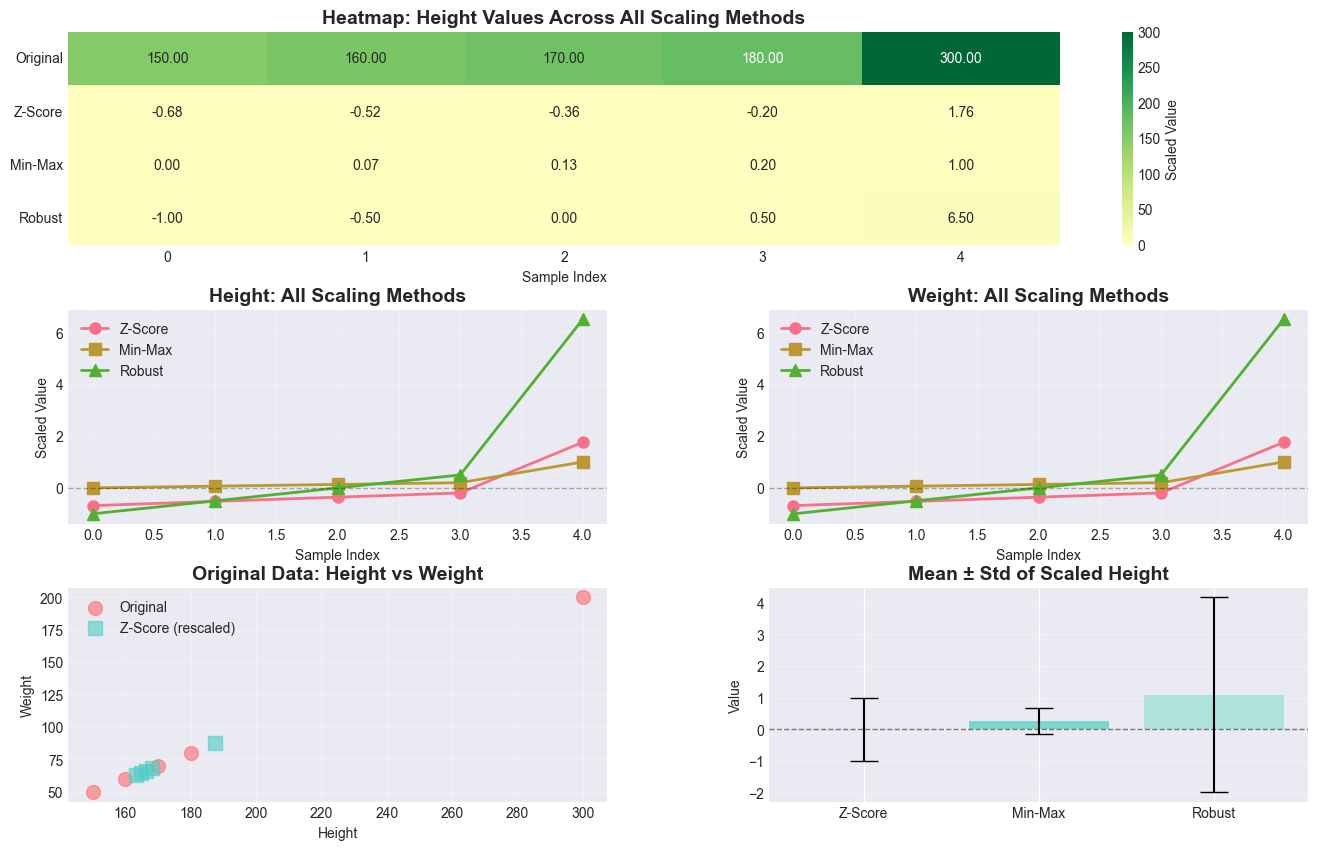


SUMMARY STATISTICS

Method          Mean (H)     Std (H)      Min (H)      Max (H)     
--------------------------------------------------------------------------------
Original        192.00       61.40        150.00       300.00      
Z-Score         0.00e+00     1.00         -0.68        1.76        
Min-Max         0.28         0.41         0.00         1.00        
Robust          1.10         3.07         -1.00        6.50        


In [550]:
# Comprehensive comparison of all scaling methods
mean = df.mean()
std = df.std()
z_scores = (df - mean) / std

mini = df.min()
maxi = df.max()
min_max = (df - mini) / (maxi - mini)

# Create comprehensive comparison DataFrame
comparison = pd.concat([
    df, 
    z_scores.add_suffix('_zscore'), 
    min_max.add_suffix('_minmax'),
    robust_scaled.add_suffix('_robust')
], axis=1)

print("=" * 80)
print("COMPREHENSIVE COMPARISON TABLE")
print("=" * 80)
print(comparison.round(2))
print("=" * 80)

# Visualization
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)

# Plot 1: Heatmap comparison
ax1 = fig.add_subplot(gs[0, :])
comparison_matrix = comparison[['h', 'h_zscore', 'h_minmax', 'h_robust']].T
sns.heatmap(comparison_matrix, annot=True, fmt='.2f', cmap='RdYlGn', center=0, ax=ax1, cbar_kws={'label': 'Scaled Value'})
ax1.set_title('Heatmap: Height Values Across All Scaling Methods', fontsize=14, fontweight='bold')
ax1.set_yticklabels(['Original', 'Z-Score', 'Min-Max', 'Robust'], rotation=0)
ax1.set_xlabel('Sample Index')

# Plot 2: Line plot comparison for Height
ax2 = fig.add_subplot(gs[1, 0])
sample_indices = range(len(df))
ax2.plot(sample_indices, z_scores['h'], 'o-', label='Z-Score', linewidth=2, markersize=8)
ax2.plot(sample_indices, min_max['h'], 's-', label='Min-Max', linewidth=2, markersize=8)
ax2.plot(sample_indices, robust_scaled['h'], '^-', label='Robust', linewidth=2, markersize=8)
ax2.set_title('Height: All Scaling Methods', fontsize=14, fontweight='bold')
ax2.set_xlabel('Sample Index')
ax2.set_ylabel('Scaled Value')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.3)

# Plot 3: Line plot comparison for Weight
ax3 = fig.add_subplot(gs[1, 1])
ax3.plot(sample_indices, z_scores['w'], 'o-', label='Z-Score', linewidth=2, markersize=8)
ax3.plot(sample_indices, min_max['w'], 's-', label='Min-Max', linewidth=2, markersize=8)
ax3.plot(sample_indices, robust_scaled['w'], '^-', label='Robust', linewidth=2, markersize=8)
ax3.set_title('Weight: All Scaling Methods', fontsize=14, fontweight='bold')
ax3.set_xlabel('Sample Index')
ax3.set_ylabel('Scaled Value')
ax3.legend()
ax3.grid(True, alpha=0.3)
ax3.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.3)

# Plot 4: Scatter plot - Original vs Scaled
ax4 = fig.add_subplot(gs[2, 0])
ax4.scatter(df['h'], df['w'], s=100, alpha=0.6, label='Original', color='#FF6B6B')
ax4.scatter(z_scores['h']*10+170, z_scores['w']*10+70, s=100, alpha=0.6, label='Z-Score (rescaled)', marker='s', color='#4ECDC4')
ax4.set_title('Original Data: Height vs Weight', fontsize=14, fontweight='bold')
ax4.set_xlabel('Height')
ax4.set_ylabel('Weight')
ax4.legend()
ax4.grid(True, alpha=0.3)

# Plot 5: Statistical summary
ax5 = fig.add_subplot(gs[2, 1])
methods = ['Z-Score', 'Min-Max', 'Robust']
means = [z_scores['h'].mean(), min_max['h'].mean(), robust_scaled['h'].mean()]
stds = [z_scores['h'].std(), min_max['h'].std(), robust_scaled['h'].std()]

x_pos = np.arange(len(methods))
ax5.bar(x_pos, means, yerr=stds, alpha=0.7, capsize=10, color=['#FF6B6B', '#4ECDC4', '#95E1D3'])
ax5.set_xticks(x_pos)
ax5.set_xticklabels(methods)
ax5.set_title('Mean ± Std of Scaled Height', fontsize=14, fontweight='bold')
ax5.set_ylabel('Value')
ax5.grid(True, alpha=0.3, axis='y')
ax5.axhline(y=0, color='black', linestyle='--', linewidth=1, alpha=0.5)

plt.show()

# Summary statistics
print("\n" + "=" * 80)
print("SUMMARY STATISTICS")
print("=" * 80)
print(f"\n{'Method':<15} {'Mean (H)':<12} {'Std (H)':<12} {'Min (H)':<12} {'Max (H)':<12}")
print("-" * 80)
print(f"{'Original':<15} {df['h'].mean():<12.2f} {df['h'].std():<12.2f} {df['h'].min():<12.2f} {df['h'].max():<12.2f}")
print(f"{'Z-Score':<15} {z_scores['h'].mean():<12.2e} {z_scores['h'].std():<12.2f} {z_scores['h'].min():<12.2f} {z_scores['h'].max():<12.2f}")
print(f"{'Min-Max':<15} {min_max['h'].mean():<12.2f} {min_max['h'].std():<12.2f} {min_max['h'].min():<12.2f} {min_max['h'].max():<12.2f}")
print(f"{'Robust':<15} {robust_scaled['h'].mean():<12.2f} {robust_scaled['h'].std():<12.2f} {robust_scaled['h'].min():<12.2f} {robust_scaled['h'].max():<12.2f}")
print("=" * 80)

## মূল শিক্ষা - বাংলায় (সম্পূর্ণ গাইড)

### 📊 তিনটি স্কেলিং পদ্ধতির সম্পূর্ণ তুলনা:

| বিষয় | Z-Score | Min-Max | Robust |
|------|---------|---------|--------|
| **সূত্র** | `(x-μ)/σ` | `(x-min)/(max-min)` | `(x-median)/IQR` |
| **ফলাফল রেঞ্জ** | সাধারণত -3 থেকে +3 | 0 থেকে 1 | সাধারণত -2 থেকে +2 |
| **গড়** | সবসময় 0 | ~0.5 | ~0 |
| **Std Dev** | সবসময় 1 | ~0.29 | পরিবর্তনশীল |
| **Outlier সমস্যা** | হ্যাঁ (মাঝারি) | হ্যাঁ (অনেক বেশি) | না (প্রতিরোধী) |
| **Distribution** | Normal প্রয়োজন | কোনো assumption নেই | কোনো assumption নেই |
| **গতি** | দ্রুত | সবচেয়ে দ্রুত | মাঝারি |

---

### 🎯 প্রতিটি পদ্ধতি কখন ব্যবহার করবেন - বিস্তারিত:

#### **1. Z-Score Normalization (স্ট্যান্ডার্ডাইজেশন)**

**✅ ব্যবহার করুন যখন:**
- ডেটা **normally distributed** (bell curve আকারে)
- **Linear Regression** ব্যবহার করছেন
- **Logistic Regression** ব্যবহার করছেন
- **Support Vector Machines (SVM)** ব্যবহার করছেন
- **Principal Component Analysis (PCA)** করবেন
- Neural Networks এর **hidden layers** এ
- যখন ডেটাকে **zero mean** এবং **unit variance** চান

**❌ ব্যবহার করবেন না যখন:**
- ডেটাতে **outliers** আছে
- ডেটা **skewed** (একদিকে ঝুঁকে আছে)
- Bounded values [0,1] দরকার (যেমন: probability)

**বাস্তব উদাহরণ:**
- মানুষের IQ scores (normally distributed)
- পরীক্ষার নম্বর (যদি outlier না থাকে)
- Temperature measurements

---

#### **2. Min-Max Normalization**

**✅ ব্যবহার করুন যখন:**
- **Neural Networks** এর input layer এ
- **Image processing** এ (0-255 → 0-1)
- **KNN** (K-Nearest Neighbors) ব্যবহার করছেন
- যখন আপনি জানেন **outliers নেই**
- যখন **bounded range [0,1]** দরকার
- **Gradient Boosting** algorithms এ

**❌ ব্যবহার করবেন না যখন:**
- ডেটাতে **outliers** আছে
- Future data-তে নতুন min/max আসতে পারে
- Test data-তে training range-এর বাইরে মান থাকতে পারে

**বাস্তব উদাহরণ:**
- Image pixels (0-255 → 0-1)
- Age normalization (যদি range জানা থাকে)
- Ratings/scores (1-5 stars)

---

#### **3. Robust Scaling**

**✅ ব্যবহার করুন যখন:**
- ডেটাতে **outliers আছে বা থাকতে পারে**
- **Real-world noisy data** নিয়ে কাজ করছেন
- **Medical/sensor data** ব্যবহার করছেন
- **Financial data** (যেখানে extreme values স্বাভাবিক)
- যখন **নিশ্চিত নন** কোনটি ব্যবহার করবেন
- বেশিরভাগ **practical ML projects** এ

**❌ ব্যবহার করবেন না যখন:**
- খুব **ছোট dataset** (< 30 samples)
- সব মান প্রায় **একই** (low variance)
- Specific range [0,1] দরকার

**বাস্তব উদাহরণ:**
- House prices (extreme values থাকে)
- Sensor readings (noise থাকে)
- Medical measurements (outliers স্বাভাবিক)
- Website traffic (spikes হয়)

---

### 🧠 দ্রুত সিদ্ধান্ত নেওয়ার ফ্লোচার্ট:

```
শুরু
  ↓
আপনার ডেটাতে Outlier আছে কি?
  ↓
  ├─→ হ্যাঁ → ROBUST SCALING ✅
  ↓
  └─→ না → আপনি Neural Network ব্যবহার করছেন?
             ↓
             ├─→ হ্যাঁ → MIN-MAX SCALING ✅
             ↓
             └─→ না → ডেটা Normally Distributed?
                        ↓
                        ├─→ হ্যাঁ → Z-SCORE ✅
                        ↓
                        └─→ না/নিশ্চিত নই → ROBUST SCALING ✅
```

---

### ⚠️ সবচেয়ে গুরুত্বপূর্ণ নিয়ম (অবশ্যই মনে রাখুন!)

#### **❌ ভুল পদ্ধতি - Data Leakage হবে:**
```python
# পুরো ডেটা scale করে তারপর split
scaled_data = scaler.fit_transform(full_data)
train, test = train_test_split(scaled_data)

# কেন ভুল?
# Test data-এর তথ্য (min, max, mean, std) training-এ leak হয়ে গেছে!
# Model আগে থেকেই test data সম্পর্কে জেনে গেছে!
```

#### **✅ সঠিক পদ্ধতি - No Data Leakage:**
```python
# আগে split, তারপর scale
train, test = train_test_split(full_data)

# শুধু train data দিয়ে scaler শিখুন
scaler.fit(train)

# একই scaler দিয়ে উভয় transform করুন
train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

# কেন সঠিক?
# Scaler শুধু training data দেখেছে
# Test data সম্পূর্ণ unseen থেকেছে
```

---

### 💻 বাস্তব ব্যবহারের জন্য Scikit-learn কোড:

```python
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.model_selection import train_test_split

# ১. ডেটা split করুন
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# ২. Scaler select করুন
scaler = RobustScaler()  # অথবা StandardScaler() বা MinMaxScaler()

# ৩. Train data দিয়ে fit করুন
scaler.fit(X_train)

# ৪. Transform করুন
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ৫. Model train করুন
model.fit(X_train_scaled, y_train)
model.predict(X_test_scaled)
```

---

### 📈 Outlier Check করার সহজ পদ্ধতি:

```python
import pandas as pd
import numpy as np

# Box plot দিয়ে visualize করুন
df.boxplot()

# IQR method দিয়ে check করুন
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Outliers identify করুন
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).sum()
print(f"Outliers found: {outliers}")

# যদি outliers > 5% → Robust Scaling ব্যবহার করুন
```

---

### 🎓 পরবর্তী পদক্ষেপ:

1. **বাস্তব datasets** এ এই techniques চেষ্টা করুন
2. **scikit-learn** এর preprocessing module নিয়ে experiment করুন
3. **মডেল performance** এ impact observe করুন
4. **Different scalers** compare করুন একই dataset এ
5. **Cross-validation** এর সাথে সঠিক scaling শিখুন

---

### 🔍 সাধারণ ভুল এবং সমাধান:

| ভুল | কেন সমস্যা | সঠিক পদ্ধতি |
|-----|-----------|-------------|
| পুরো ডেটা scale করে split | Data leakage | আগে split, তারপর scale |
| Test data দিয়ে fit করা | Test info leak | শুধু train data দিয়ে fit |
| প্রতিবার নতুন scaler | Inconsistency | একই scaler save করুন |
| Categorical data scale করা | অর্থহীন | One-hot encode করুন আগে |
| Target variable scale করা | Prediction বুঝতে সমস্যা | শুধু features scale করুন |

---

### 💡 মনে রাখার সহজ উপায়:

- 🎯 **নিশ্চিত না?** → **Robust Scaling** (সবচেয়ে নিরাপদ!)
- 🖼️ **Neural Network/Images?** → **Min-Max Scaling**
- 📊 **Normal Distribution?** → **Z-Score Scaling**
- 🚫 **Outliers আছে?** → **Robust Scaling** (100%)
- ⚡ **সবসময়:** Train-Test Split → তারপর Scaling

In [551]:
df = pd.DataFrame({
    'id': [1, 2, 3, 4, 5],
    'color': ['red', 'blue', 'green', 'blue', 'red'],
    'size': ['S', 'M', 'L', 'XL', 'S'],
    'price': [10.5, 20.0, 15.0, 25.0, 10.5]
})

df

,id,color,size,price
0,1,red,S,10.5
1,2,blue,M,20.0
2,3,green,L,15.0
3,4,blue,XL,25.0
4,5,red,S,10.5


In [552]:
d_color = pd.get_dummies(df['color'], prefix='color', dtype=int)
d_color


,color_blue,color_green,color_red
0,0,0,1
1,1,0,0
2,0,1,0
3,1,0,0
4,0,0,1


In [553]:
df.encoded = pd.concat([df, d_color], axis=1)
df.encoded.drop(columns=['color'], inplace=True)
df.encoded

C:\Users\shari\AppData\Local\Temp\ipykernel_31996\4069609051.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.encoded = pd.concat([df, d_color], axis=1)


,id,size,price,color_blue,color_green,color_red
0,1,S,10.5,0,0,1
1,2,M,20.0,1,0,0
2,3,L,15.0,0,1,0
3,4,XL,25.0,1,0,0
4,5,S,10.5,0,0,1


---

## সম্পূর্ণ সারাংশ

### এই নোটবুকে আমরা কী শিখলাম?

#### **তিনটি স্কেলিং পদ্ধতি:**

| পদ্ধতি | সূত্র | কখন ব্যবহার | সুবিধা | অসুবিধা |
|--------|------|------------|--------|----------|
| **Z-Score** | `(x - mean) / std` | Normal distribution | ডেটা 0-এর কাছাকাছি | Outlier সমস্যা |
| **Min-Max** | `(x - min) / (max - min)` | Neural Networks | সবকিছু [0,1] এ | Outlier-এ খুব sensitive |
| **Robust** | `(x - median) / IQR` | Outlier আছে | Outlier প্রতিরোধী | রেঞ্জ কম intuitive |

#### **সহজ মনে রাখার উপায়:**

1. **আপনার ডেটাতে Outlier আছে?**
   - **হ্যাঁ** → Robust Scaling ব্যবহার করুন
   - **না** → Z-Score অথবা Min-Max ব্যবহার করুন

2. **আপনি Neural Network ব্যবহার করছেন?**
   - **হ্যাঁ** → Min-Max Scaling ব্যবহার করুন (0-1 রেঞ্জ দরকার)
   - **না** → Z-Score ব্যবহার করুন (Linear/Logistic Regression এর জন্য)

3. **নিশ্চিত না?**
   - **Robust Scaling** সবচেয়ে নিরাপদ পছন্দ!

#### **গুরুত্বপূর্ণ মনে রাখুন (অবশ্যই!):**

```python
# ভুল পদ্ধতি ❌
scaled_data = scaler.fit_transform(full_data)
train, test = train_test_split(scaled_data)

# সঠিক পদ্ধতি ✅
train, test = train_test_split(full_data)
scaler.fit(train)  # শুধু train ডেটা দিয়ে fit করুন
train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)  # একই scaler দিয়ে transform করুন
```

## One-Hot Encoding (ওয়ান-হট এনকোডিং) - সম্পূর্ণ বাংলা ব্যাখ্যা

### 🤔 কী এটি?
যখন ডেটাতে **categorical/text values** থাকে (যেমন: color = 'red', 'blue', 'green'), তখন সেগুলোকে সংখ্যায় রূপান্তর করার জন্য এই পদ্ধতি ব্যবহার করা হয়।

### 🎯 কেন দরকার?
1. মেশিন লার্নিং মডেল **শুধু সংখ্যা** বুঝতে পারে, টেক্সট বুঝতে পারে না
2. সরাসরি number assign করলে সমস্যা হয়:
   ```
   ভুল পদ্ধতি:
   red = 1, blue = 2, green = 3
   
   সমস্যা: মডেল মনে করবে blue > red > green
   কিন্তু বাস্তবে এদের মধ্যে কোনো order নেই!
   ```
3. One-hot encoding এ প্রতিটি category একটি **আলাদা column** পায়

### 🔄 কীভাবে কাজ করে - ধাপে ধাপে:

#### **ধাপ ১: মূল ডেটা**
```
   id  color   size  price
0   1   red     S     10.5
1   2   blue    M     20.0
2   3   green   L     15.0
3   4   blue    XL    25.0
4   5   red     S     10.5
```

#### **ধাপ ২: Unique categories খুঁজুন**
```
color এর unique values: red, blue, green (3টি)
```

#### **ধাপ ৩: প্রতিটি category-র জন্য নতুন column তৈরি**
```
color_red  color_blue  color_green
```

#### **ধাপ ৪: Binary values (0 বা 1) assign করুন**
```
মূল color → One-hot encoded:

red   → color_red=1, color_blue=0, color_green=0
blue  → color_red=0, color_blue=1, color_green=0
green → color_red=0, color_blue=0, color_green=1
```

#### **ধাপ ৫: সম্পূর্ণ রূপান্তরিত ডেটা**
```
   id  size  price  color_red  color_blue  color_green
0   1   S     10.5      1          0           0        ← red
1   2   M     20.0      0          1           0        ← blue
2   3   L     15.0      0          0           1        ← green
3   4   XL    25.0      0          1           0        ← blue
4   5   S     10.5      1          0           0        ← red
```

---

### 📊 বুঝার সহজ উপায় - গল্পের মাধ্যমে:

**কল্পনা করুন:** একটি ক্লাসে তিন ধরনের ছাত্র আছে - খেলোয়াড়, শিল্পী, বিজ্ঞানী

**ভুল পদ্ধতি:**
```
খেলোয়াড় = 1, শিল্পী = 2, বিজ্ঞানী = 3
সমস্যা: বিজ্ঞানী > শিল্পী > খেলোয়াড়? কেন!
```

**One-Hot Encoding (সঠিক পদ্ধতি):**
```
         খেলোয়াড়  শিল্পী  বিজ্ঞানী
রহিম        1       0       0     ← খেলোয়াড়
করিম        0       1       0     ← শিল্পী
সালমা       0       0       1     ← বিজ্ঞানী
নাসিম       1       0       0     ← খেলোয়াড়
```
দেখুন! এখন কোনো অর্ডার নেই। সবাই সমান!

---

### 💻 Python কোড উদাহরণ:

#### **পদ্ধতি ১: Pandas ব্যবহার করে (সহজ)**
```python
import pandas as pd

# মূল ডেটা
df = pd.DataFrame({
    'color': ['red', 'blue', 'green', 'blue', 'red']
})

# One-hot encoding
encoded = pd.get_dummies(df['color'], prefix='color', dtype=int)

# Result:
#    color_blue  color_green  color_red
# 0           0            0          1
# 1           1            0          0
# 2           0            1          0
# 3           1            0          0
# 4           0            0          1
```

#### **পদ্ধতি ২: Scikit-learn ব্যবহার করে (Professional)**
```python
from sklearn.preprocessing import OneHotEncoder
import numpy as np

# মূল ডেটা
colors = np.array(['red', 'blue', 'green', 'blue', 'red']).reshape(-1, 1)

# OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
encoded = encoder.fit_transform(colors)

print(encoded)
# [[0. 0. 1.]  ← red
#  [1. 0. 0.]  ← blue
#  [0. 1. 0.]  ← green
#  [1. 0. 0.]  ← blue
#  [0. 0. 1.]] ← red
```

---

### ⚠️ সাবধানতা এবং সমস্যা:

#### **১. Dummy Variable Trap (ডামি ভেরিয়েবল ট্র্যাপ)**

**সমস্যা:** যদি 3টি color থাকে, তাহলে আসলে 2টি column যথেষ্ট!

**কেন?**
```
যদি color_red=0 এবং color_blue=0 হয়,
তাহলে নিশ্চিতভাবে color_green=1 হবে!

সুতরাং color_green column অপ্রয়োজনীয়!
```

**সমাধান:**
```python
# drop_first=True ব্যবহার করুন
encoded = pd.get_dummies(df['color'], prefix='color', drop_first=True, dtype=int)

# এখন শুধু 2টি column:
#    color_green  color_red
# 0            0          1
# 1            0          0  ← blue (উভয় 0 = blue)
# 2            1          0
```

#### **২. High Cardinality Problem (অনেক বেশি categories)**

**সমস্যা:** যদি 1000টি unique cities থাকে, তাহলে 1000টি columns তৈরি হবে!

**সমাধান:**
- **Frequency Encoding:** কতবার appear করেছে তার count
- **Target Encoding:** প্রতিটি category-র average target value
- **Grouping:** কম frequent categories একসাথে করা

```python
# উদাহরণ: Top 10 cities রাখুন, বাকি 'Other'
top_cities = df['city'].value_counts().head(10).index
df['city'] = df['city'].apply(lambda x: x if x in top_cities else 'Other')
```

---

### 🎓 কখন One-Hot Encoding ব্যবহার করবেন:

#### **✅ ব্যবহার করুন যখন:**
- **Nominal categories** (কোনো order নেই): color, city, gender
- Categories সংখ্যা **কম** (< 10-15টি)
- **Linear models** ব্যবহার করছেন (Regression, SVM)
- **Neural Networks** ব্যবহার করছেন

#### **❌ ব্যবহার করবেন না যখন:**
- **Ordinal categories** (order আছে): small < medium < large
- অনেক **বেশি unique values** (>50)
- **Tree-based models** (Decision Tree, Random Forest) - এরা categorical data সরাসরি handle করতে পারে

---

### 📈 Ordinal Encoding vs One-Hot Encoding:

| বিষয় | Ordinal Encoding | One-Hot Encoding |
|------|-----------------|------------------|
| **কখন ব্যবহার** | Order আছে | Order নেই |
| **উদাহরণ** | Small=1, Medium=2, Large=3 | Red=[1,0,0], Blue=[0,1,0] |
| **Columns সংখ্যা** | 1টি | N টি (N = categories) |
| **সুবিধা** | কম space | সঠিক representation |
| **অসুবিধা** | False ordering | বেশি columns |

**উদাহরণ - Education Level (Ordinal):**
```python
# এটি ঠিক আছে কারণ order আছে:
education_map = {
    'High School': 1,
    'Bachelor': 2,
    'Master': 3,
    'PhD': 4
}
df['education_encoded'] = df['education'].map(education_map)
```

**উদাহরণ - Color (Nominal):**
```python
# এটি ভুল! কারণ color-এর কোনো order নেই
color_map = {'red': 1, 'blue': 2, 'green': 3}  # ❌ ভুল!

# One-hot encoding করুন ✅
encoded = pd.get_dummies(df['color'])
```

---

### 💡 মনে রাখার সহজ টিপস:

- 🎨 **Color, City, Name** → One-Hot Encoding (কোনো order নেই)
- 📏 **Size (S, M, L), Rating (1-5)** → Ordinal Encoding (order আছে)
- 🔢 **Categories < 15** → One-Hot নিরাপদ
- 🔢 **Categories > 50** → অন্য পদ্ধতি খুঁজুন (Target/Frequency Encoding)
- 🌳 **Tree models** → Encoding এর তেমন প্রয়োজন নেই
- 📊 **Linear models** → One-Hot অবশ্যই দরকার

---

### 🔍 বাস্তব উদাহরণ:

```python
# সম্পূর্ণ preprocessing pipeline
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

# ডেটা
df = pd.DataFrame({
    'age': [25, 30, 35, 40],
    'city': ['Dhaka', 'Chittagong', 'Dhaka', 'Sylhet'],
    'salary': [30000, 50000, 45000, 55000]
})

# Categorical এবং Numerical columns আলাদা করুন
categorical_cols = ['city']
numerical_cols = ['age', 'salary']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(drop='first'), categorical_cols)
    ])

# Transform
transformed = preprocessor.fit_transform(df)
```

এভাবে একসাথে numerical scaling এবং categorical encoding করা যায়!

In [554]:
a = np.array([2, 1, 3])
b = np.array([1, 3, 3])

dot_product = np.dot(a, b)
dot_product

np.int64(14)

In [555]:
l2_a = np.linalg.norm(a)
l2_a

np.float64(3.7416573867739413)

In [556]:
l1_a = np.linalg.norm(a, ord=1)
l1_a

np.float64(6.0)

In [557]:
unit_vector = a / l2_a
unit_vector

len_vector = np.linalg.norm(unit_vector)
len_vector

np.float64(1.0)

In [558]:
x = np.array([
    [70, 80],
    [60, 90],
    [85, 60],
    [78, 72],
    [62, 65]
], dtype=float)

q = np.array([75, 70], dtype=float)

In [559]:
print("Data points (x):\n", x)
print("\nQuery point (q):\n", q)

Data points (x):
 [[70. 80.]
 [60. 90.]
 [85. 60.]
 [78. 72.]
 [62. 65.]]

Query point (q):
 [75. 70.]


In [560]:
eu = np.linalg.norm(x - q, axis=1)
print("Euclidean distances from q to each x:\n", eu.round(2).tolist())

Euclidean distances from q to each x:
 [11.18, 25.0, 14.14, 3.61, 13.93]


In [561]:
manhattan = np.linalg.norm(x - q, ord=1, axis=1)
print("Manhattan distances from q to each x:\n", manhattan.round(2).tolist())

Manhattan distances from q to each x:
 [15.0, 35.0, 20.0, 5.0, 18.0]


# Problem 1 — Scaling head-to-head
## You have Weight_kg = [58, 62, 65, 66, 190] and Height_cm = [150, 160, 170, 175, 180].
Tasks:
- a) Compute the Standardization for both features by hand on the first three values only.
- b) Compute Min–Max Scaling to [0, 1] for all values.
- c) Compute Robust Scaling for Weight_kg using median and IQR.
- d) Which method handles the outlier in Weight_kg best and why?

In [562]:
import numpy as np
import pandas as pd

# Given data
weight = np.array([58, 62, 65, 66, 190])
height = np.array([150, 160, 170, 175, 180])

# --------------------------------------------------------
# (a) STANDARDIZATION for first *three* values only
# --------------------------------------------------------

# Weight
w3 = weight[:3]
w_mean = w3.mean()
w_std = w3.std()  # population standard deviation
w_standardized = (w3 - w_mean) / w_std

# Height
h3 = height[:3]
h_mean = h3.mean()
h_std = h3.std()  # population SD
h_standardized = (h3 - h_mean) / h_std

print("=== (a) STANDARDIZATION (first 3 values) ===")
print("Weight standardized:", w_standardized)
print("Height standardized:", h_standardized)

# --------------------------------------------------------
# (b) MIN–MAX SCALING to [0, 1] for all values
# --------------------------------------------------------

w_minmax = (weight - weight.min()) / (weight.max() - weight.min())
h_minmax = (height - height.min()) / (height.max() - height.min())

print("\n=== (b) MIN–MAX Scaling ===")
print("Weight Min–Max:", w_minmax)
print("Height Min–Max:", h_minmax)

# --------------------------------------------------------
# (c) ROBUST SCALING for Weight
# --------------------------------------------------------

w_median = np.median(weight)
w_q1 = np.percentile(weight, 25)
w_q3 = np.percentile(weight, 75)
w_iqr = w_q3 - w_q1

w_robust = (weight - w_median) / w_iqr

print("\n=== (c) ROBUST Scaling (Weight) ===")
print("Median:", w_median)
print("Q1:", w_q1)
print("Q3:", w_q3)
print("IQR:", w_iqr)
print("Weight Robust Scaled:", w_robust)

# --------------------------------------------------------
# (d) Explanation
# --------------------------------------------------------

print("\n=== (d) Which handles the outlier best? ===")
print("Robust Scaling handles the outlier best because it uses median and IQR,")
print("which are not influenced by extreme values like 190.")


=== (a) STANDARDIZATION (first 3 values) ===
Weight standardized: [-1.27872403  0.11624764  1.16247639]
Height standardized: [-1.22474487  0.          1.22474487]

=== (b) MIN–MAX Scaling ===
Weight Min–Max: [0.         0.03030303 0.0530303  0.06060606 1.        ]
Height Min–Max: [0.         0.33333333 0.66666667 0.83333333 1.        ]

=== (c) ROBUST Scaling (Weight) ===
Median: 65.0
Q1: 62.0
Q3: 66.0
IQR: 4.0
Weight Robust Scaled: [-1.75 -0.75  0.    0.25 31.25]

=== (d) Which handles the outlier best? ===
Robust Scaling handles the outlier best because it uses median and IQR,
which are not influenced by extreme values like 190.


# Problem 2 — When to use which scaler
You are preparing features for a simple model:
Monthly_Income in BDT with a few extremely high earners
Room_Temperature_C within 18 to 30
Transaction_Count_Last_7_Days with many zeros and a few heavy shoppers


Tasks:
 a) For each feature, pick one scaler: Standardization, Min–Max, or Robust. Justify each choice in one sentence.
 b) Give a quick numeric example showing why your chosen scaler is safer or more interpretable for that feature.

=== Monthly Income (Robust Scaler) ===
Original: [ 20000  25000  30000 450000]
Robust Scaled: [-0.06741573 -0.02247191  0.02247191  3.79775281]

=== Room Temperature (Min–Max Scaler) ===
Original: [18 20 25 28 30]
Min–Max Scaled: [0.         0.16666667 0.58333333 0.83333333 1.        ]

=== Transaction Count Last 7 Days (Robust Scaler) ===
Original: [ 0  0  1  2 35]
Robust Scaled: [-0.5 -0.5  0.   0.5 17. ]



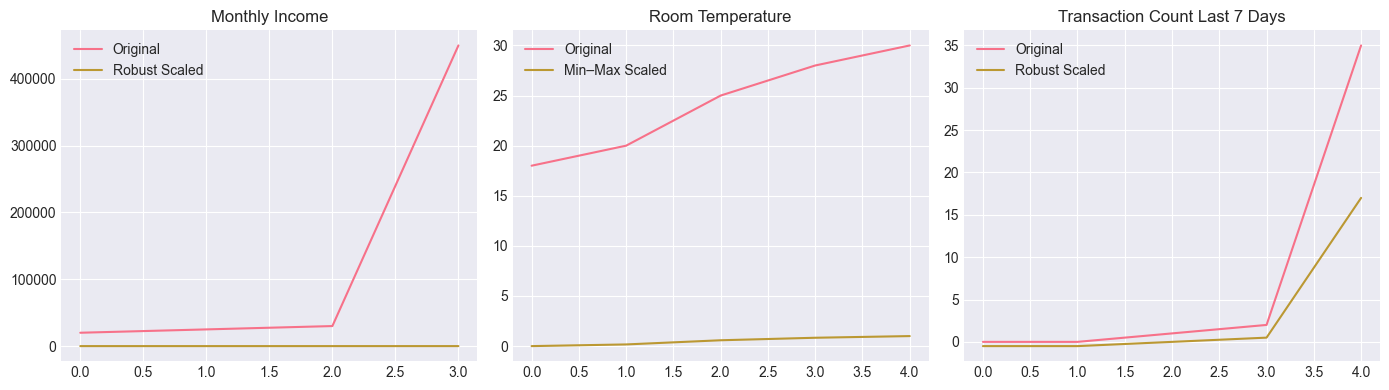

In [563]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
import matplotlib.pyplot as plt

# =============================================
# Example Data (as used in the explanations)
# =============================================

monthly_income = np.array([20000, 25000, 30000, 450000]).reshape(-1, 1)
room_temp = np.array([18, 20, 25, 28, 30]).reshape(-1, 1)
transaction_count = np.array([0, 0, 1, 2, 35]).reshape(-1, 1)

# =============================================
# Choose Scalers
# =============================================

robust_scaler = RobustScaler()
minmax_scaler = MinMaxScaler()

# Apply chosen scalers
income_robust = robust_scaler.fit_transform(monthly_income)
temp_minmax = minmax_scaler.fit_transform(room_temp)
trans_robust = robust_scaler.fit_transform(transaction_count)

# =============================================
# Print Results
# =============================================

print("=== Monthly Income (Robust Scaler) ===")
print("Original:", monthly_income.reshape(-1))
print("Robust Scaled:", income_robust.reshape(-1))
print()

print("=== Room Temperature (Min–Max Scaler) ===")
print("Original:", room_temp.reshape(-1))
print("Min–Max Scaled:", temp_minmax.reshape(-1))
print()

print("=== Transaction Count Last 7 Days (Robust Scaler) ===")
print("Original:", transaction_count.reshape(-1))
print("Robust Scaled:", trans_robust.reshape(-1))
print()

# =============================================
# Optional: Visual Comparison Plots
# =============================================

plt.figure(figsize=(14, 4))

# Monthly Income
plt.subplot(1, 3, 1)
plt.plot(monthly_income, label="Original")
plt.plot(income_robust, label="Robust Scaled")
plt.title("Monthly Income")
plt.legend()

# Room Temperature
plt.subplot(1, 3, 2)
plt.plot(room_temp, label="Original")
plt.plot(temp_minmax, label="Min–Max Scaled")
plt.title("Room Temperature")
plt.legend()

# Transaction Count
plt.subplot(1, 3, 3)
plt.plot(transaction_count, label="Original")
plt.plot(trans_robust, label="Robust Scaled")
plt.title("Transaction Count Last 7 Days")
plt.legend()

plt.tight_layout()
plt.show()


Problem 3 — Nominal vs Ordinal and encoding
Dataset:
ID      City        Education_Level     Satisfaction
1       Dhaka       High School         Low
2       Chattogram  Bachelor            Medium
3       Rajshahi    Master              High
4       Dhaka       Bachelor            Medium

Tasks:
 a) Mark which are nominal and which are ordinal.
 b) One-hot encode City by hand for the 4 rows. Use 0 and 1.
 c) Ordinal-encode Education_Level with High School=0, Bachelor=1, Master=2.

In [564]:
import pandas as pd

# ================================
# Create the dataset
# ================================

data = {
    "ID": [1, 2, 3, 4],
    "City": ["Dhaka", "Chattogram", "Rajshahi", "Dhaka"],
    "Education_Level": ["High School", "Bachelor", "Master", "Bachelor"],
    "Satisfaction": ["Low", "Medium", "High", "Medium"]
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)
print("\n")

# ================================
# (a) Mark nominal and ordinal
# ================================

nominal_features = ["City"]
ordinal_features = ["Education_Level", "Satisfaction"]

print("Nominal Features:", nominal_features)
print("Ordinal Features:", ordinal_features)
print("\n")

# ================================
# (b) One-hot encode City
# ================================

city_ohe = pd.get_dummies(df["City"], prefix="City")
print("One-hot Encoded City:")
print(city_ohe)
print("\n")

# Add it to the main df
df_ohe = pd.concat([df, city_ohe], axis=1)

# ================================
# (c) Ordinal encode Education_Level
# ================================

education_map = {
    "High School": 0,
    "Bachelor": 1,
    "Master": 2
}

df_ohe["Education_Level_Encoded"] = df_ohe["Education_Level"].map(education_map)

print("Data with Ordinal-Encoded Education_Level:")
print(df_ohe)


Original DataFrame:
   ID        City Education_Level Satisfaction
0   1       Dhaka     High School          Low
1   2  Chattogram        Bachelor       Medium
2   3    Rajshahi          Master         High
3   4       Dhaka        Bachelor       Medium


Nominal Features: ['City']
Ordinal Features: ['Education_Level', 'Satisfaction']


One-hot Encoded City:
   City_Chattogram  City_Dhaka  City_Rajshahi
0            False        True          False
1             True       False          False
2            False       False           True
3            False        True          False


Data with Ordinal-Encoded Education_Level:
   ID        City Education_Level Satisfaction  City_Chattogram  City_Dhaka  \
0   1       Dhaka     High School          Low            False        True   
1   2  Chattogram        Bachelor       Medium             True       False   
2   3    Rajshahi          Master         High            False       False   
3   4       Dhaka        Bachelor       Medium 

# Problem 4 — Vectors, dot product, norms
Given vectors a = [3, −1, 2] and b = [4, 0, −2].
Tasks:
 a) Compute the dot product a·b by hand.
 b) Compute L1 and L2 norms of a.
 c) Write a tiny numpy snippet to verify.

In [565]:
import numpy as np

a = np.array([3, -1, 2])
b = np.array([4, 0, -2])

# Dot product
dot_prod = np.dot(a, b)

# Norms
l1_norm = np.linalg.norm(a, 1)
l2_norm = np.linalg.norm(a, 2)

print("Dot product:", dot_prod)
print("L1 norm:", l1_norm)
print("L2 norm:", l2_norm)


Dot product: 8
L1 norm: 6.0
L2 norm: 3.7416573867739413


# Problem 5 — Euclidean vs Manhattan distance in practice
Points: P1(2, 3), P2(5, 7), P3(2, 10).
Tasks:
 a) Compute Euclidean and Manhattan distances for all pairs by hand.
 b) Which metric changes more when a single coordinate has a large jump, and why?
 c) Scale the y-coordinate by a factor of 10 and recompute distances between P1 and P2. What did this do to your intuition?

In [566]:
import numpy as np
import pandas as pd

# --------------------------
# 1. Define points
# --------------------------
P1 = np.array([2, 3])
P2 = np.array([5, 7])
P3 = np.array([2, 10])

points = {
    "P1-P2": (P1, P2),
    "P1-P3": (P1, P3),
    "P2-P3": (P2, P3),
}

# --------------------------
# Helper functions
# --------------------------
def euclidean(a, b):
    return np.sqrt(np.sum((a - b) ** 2))

def manhattan(a, b):
    return np.sum(np.abs(a - b))

# --------------------------
# 2. Compute distances
# --------------------------
results = []

for name, (A, B) in points.items():
    results.append({
        "Pair": name,
        "Euclidean": euclidean(A, B),
        "Manhattan": manhattan(A, B)
    })

df = pd.DataFrame(results)
print("=== Original Distances ===")
print(df)

# --------------------------
# 3. Scale y-coordinate by factor of 10
# --------------------------
scale_factor = 10

P1_scaled = np.array([2, 3 * scale_factor])
P2_scaled = np.array([5, 7 * scale_factor])

eu_scaled = euclidean(P1_scaled, P2_scaled)
man_scaled = manhattan(P1_scaled, P2_scaled)

print("\n=== Distances after Scaling y by 10 (P1-P2) ===")
print(f"Euclidean: {eu_scaled}")
print(f"Manhattan: {man_scaled}")

# --------------------------
# 4. Explanation summary (printed for clarity)
# --------------------------
print("\n=== Interpretation ===")
print("• Manhattan distance increases linearly with coordinate jumps.")
print("• Euclidean distance increases with the square root of squared jumps, so large jumps dominate more.")
print("• After scaling y by 10, both distances grow, but Euclidean becomes much larger because the squared term dominates.")


=== Original Distances ===
    Pair  Euclidean  Manhattan
0  P1-P2   5.000000          7
1  P1-P3   7.000000          7
2  P2-P3   4.242641          6

=== Distances after Scaling y by 10 (P1-P2) ===
Euclidean: 40.11234224026316
Manhattan: 43

=== Interpretation ===
• Manhattan distance increases linearly with coordinate jumps.
• Euclidean distance increases with the square root of squared jumps, so large jumps dominate more.
• After scaling y by 10, both distances grow, but Euclidean becomes much larger because the squared term dominates.
